### Next Word Prediction Using LSTM
Project Overview:

1- Data Collection: Using the text of Shakespeare's "Hamlet" as dataset. 

2- Data Preprocessing: The text data is tokenized, converted into sequences, and padded to ensure uniform input lengths. The sequences are then split into training and testing sets.

3- Model Building: An LSTM model is constructed with an embedding layer, two LSTM layers, and a dense output layer with a softmax activation function to predict the probability of the next word.

4- Model Training: The model is trained using the prepared sequences, with early stopping implemented to prevent overfitting. Early stopping monitors the validation loss and stops training when the loss stops improving.

5- Model Evaluation: The model is evaluated using a set of example sentences to test its ability to predict the next word accurately.

6- Deployment: A Streamlit web application is developed to allow users to input a sequence of words and get the predicted next word in real-time.


In [1]:
# Data Collection
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import numpy as np
import pandas as pd 
import tensorflow as tf

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\yogit\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [2]:
# Load the dataset
data = gutenberg.raw('shakespeare-hamlet.txt')    

# Save the dataset in a text file
with open('hamlet.txt', 'w') as file:
    file.write(data)
    

In [3]:
# Data Preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [4]:
# Load the dataset
with open('hamlet.txt', 'r') as file:
    text = file.read().lower()


In [5]:
# tokenize the text creating indexes for words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1
total_words

4818

In [6]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'of': 4,
 'i': 5,
 'you': 6,
 'a': 7,
 'my': 8,
 'it': 9,
 'in': 10,
 'that': 11,
 'ham': 12,
 'is': 13,
 'not': 14,
 'his': 15,
 'this': 16,
 'with': 17,
 'your': 18,
 'but': 19,
 'for': 20,
 'me': 21,
 'lord': 22,
 'as': 23,
 'what': 24,
 'he': 25,
 'be': 26,
 'so': 27,
 'him': 28,
 'haue': 29,
 'king': 30,
 'will': 31,
 'no': 32,
 'our': 33,
 'we': 34,
 'on': 35,
 'are': 36,
 'if': 37,
 'all': 38,
 'then': 39,
 'shall': 40,
 'by': 41,
 'thou': 42,
 'come': 43,
 'or': 44,
 'hamlet': 45,
 'good': 46,
 'do': 47,
 'hor': 48,
 'her': 49,
 'let': 50,
 'now': 51,
 'thy': 52,
 'how': 53,
 'more': 54,
 'they': 55,
 'from': 56,
 'enter': 57,
 'at': 58,
 'was': 59,
 'oh': 60,
 'like': 61,
 'most': 62,
 'there': 63,
 'well': 64,
 'know': 65,
 'selfe': 66,
 'would': 67,
 'them': 68,
 'loue': 69,
 'may': 70,
 "'tis": 71,
 'vs': 72,
 'sir': 73,
 'qu': 74,
 'which': 75,
 'did': 76,
 'why': 77,
 'laer': 78,
 'giue': 79,
 'thee': 80,
 'ile': 81,
 'must': 82,
 'hath': 

In [7]:
# create input sequences and labels
input_sequence = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    for i in range(1, len(token_list)):
        in_seq = token_list[:i+1]
        input_sequence.append(in_seq)
        
        
input_sequence

[[1, 687],
 [1, 687, 4],
 [1, 687, 4, 45],
 [1, 687, 4, 45, 41],
 [1, 687, 4, 45, 41, 1886],
 [1, 687, 4, 45, 41, 1886, 1887],
 [1, 687, 4, 45, 41, 1886, 1887, 1888],
 [1180, 1889],
 [1180, 1889, 1890],
 [1180, 1889, 1890, 1891],
 [57, 407],
 [57, 407, 2],
 [57, 407, 2, 1181],
 [57, 407, 2, 1181, 177],
 [57, 407, 2, 1181, 177, 1892],
 [407, 1182],
 [407, 1182, 63],
 [408, 162],
 [408, 162, 377],
 [408, 162, 377, 21],
 [408, 162, 377, 21, 247],
 [408, 162, 377, 21, 247, 882],
 [18, 66],
 [451, 224],
 [451, 224, 248],
 [451, 224, 248, 1],
 [451, 224, 248, 1, 30],
 [408, 407],
 [451, 25],
 [408, 6],
 [408, 6, 43],
 [408, 6, 43, 62],
 [408, 6, 43, 62, 1893],
 [408, 6, 43, 62, 1893, 96],
 [408, 6, 43, 62, 1893, 96, 18],
 [408, 6, 43, 62, 1893, 96, 18, 566],
 [451, 71],
 [451, 71, 51],
 [451, 71, 51, 1894],
 [451, 71, 51, 1894, 567],
 [451, 71, 51, 1894, 567, 378],
 [451, 71, 51, 1894, 567, 378, 80],
 [451, 71, 51, 1894, 567, 378, 80, 3],
 [451, 71, 51, 1894, 567, 378, 80, 3, 273],
 [451, 71

In [8]:
# Pad Sequence
max_sequence_len = max([len(x) for x in input_sequence])
print(f'max_sequence_len: {max_sequence_len}') # max_sequence_len)
input_sequence = np.array(pad_sequences(input_sequence, maxlen = max_sequence_len, padding = 'pre'))
print(f'input_sequence: {input_sequence}')
print(f'input_sequence.shape: {input_sequence.shape}')


max_sequence_len: 14
input_sequence: [[   0    0    0 ...    0    1  687]
 [   0    0    0 ...    1  687    4]
 [   0    0    0 ...  687    4   45]
 ...
 [   0    0    0 ...    4   45 1047]
 [   0    0    0 ...   45 1047    4]
 [   0    0    0 ... 1047    4  193]]
input_sequence.shape: (25732, 14)


In [9]:
# create predictor and target labels
predictors, label = input_sequence[:,:-1], input_sequence[:,-1]
print(f'predictors: {predictors}')
print(f'label: {label}')
print(f'predictors.shape: {predictors.shape}')
print(f'label.shape: {label.shape}')

predictors: [[   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    1  687]
 [   0    0    0 ...    1  687    4]
 ...
 [   0    0    0 ...  687    4   45]
 [   0    0    0 ...    4   45 1047]
 [   0    0    0 ...   45 1047    4]]
label: [ 687    4   45 ... 1047    4  193]
predictors.shape: (25732, 13)
label.shape: (25732,)


In [10]:
X = predictors
y = tf.keras.utils.to_categorical(label, num_classes = total_words)


In [11]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (17240, 13)
X_test shape: (8492, 13)
y_train shape: (17240, 4818)
y_test shape: (8492, 4818)


In [21]:
# Define early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 50, restore_best_weights = True)


In [22]:
# Train LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization

# define the model
lstm_model0 = Sequential()
lstm_model0.add(Embedding(total_words, 100, input_length = max_sequence_len-1))
lstm_model0.add(LSTM(128, return_sequences=True))
lstm_model0.add(BatchNormalization())
lstm_model0.add(Dropout(0.2))
lstm_model0.add(LSTM(128))
lstm_model0.add(Dense(total_words, activation = 'softmax'))




In [23]:
from tensorflow.keras.optimizers import Adam
lstm_model0.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
history = lstm_model0.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test), verbose=1, callbacks = [early_stop])

Epoch 1/100
539/539 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.0308 - loss: 7.1603 - val_accuracy: 0.0405 - val_loss: 6.7125
Epoch 2/100
539/539 ━━━━━━━━━━━━━━━━━━━━ 56s 105ms/step - accuracy: 0.0420 - loss: 6.3714 - val_accuracy: 0.0549 - val_loss: 6.7478
Epoch 3/100
539/539 ━━━━━━━━━━━━━━━━━━━━ 95s 129ms/step - accuracy: 0.0599 - loss: 6.0850 - val_accuracy: 0.0599 - val_loss: 6.7270
Epoch 4/100
539/539 ━━━━━━━━━━━━━━━━━━━━ 71s 108ms/step - accuracy: 0.0749 - loss: 5.8295 - val_accuracy: 0.0691 - val_loss: 6.7754
Epoch 5/100
539/539 ━━━━━━━━━━━━━━━━━━━━ 100s 138ms/step - accuracy: 0.0888 - loss: 5.5646 - val_accuracy: 0.0685 - val_loss: 6.8800
Epoch 6/100
539/539 ━━━━━━━━━━━━━━━━━━━━ 57s 91ms/step - accuracy: 0.1023 - loss: 5.2725 - val_accuracy: 0.0663 - val_loss: 7.0455
Epoch 7/100
539/539 ━━━━━━━━━━━━━━━━━━━━ 67s 124ms/step - accuracy: 0.1124 - loss: 5.0615 - val_accuracy: 0.0662 - val_loss: 7.0979
Epoch 8/100
539/539 ━━━━━━━━━━━━━━━━━━━━ 49s 90ms/step - accuracy: 0.1297 - l

In [25]:
lstm_model0.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 13, 100)        │       481,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 13, 128)        │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4818)           │       621,522 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,057,488 (15.48 MB)

 Trainable params: 1,352,410 (5.16 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 2,704,822 (10.32 MB)

In [26]:
lstm_model0.evaluate(X_test, y_test)

266/266 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.0431 - loss: 6.6914


[6.712547779083252, 0.04050871357321739]

<Figure size 640x480 with 0 Axes>

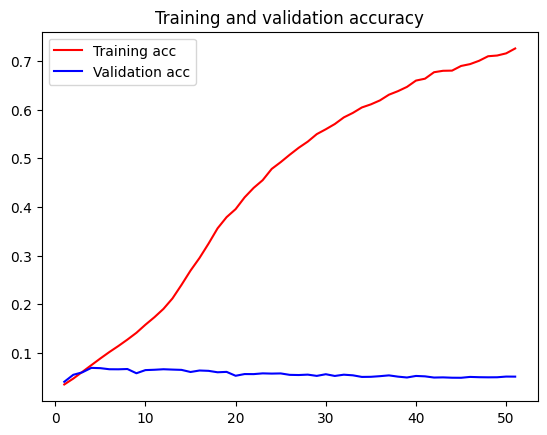

<Figure size 640x480 with 0 Axes>

In [27]:
# Ploting results
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

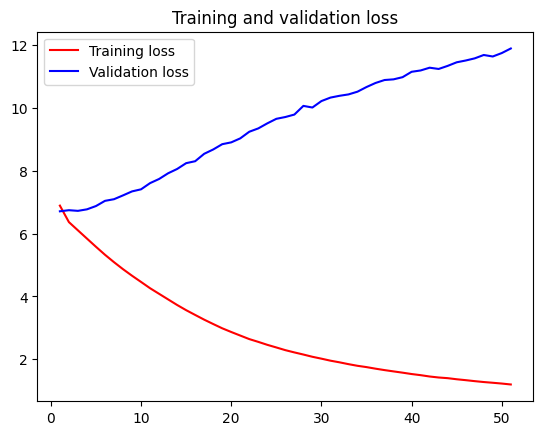

In [28]:
# Plot training and validation loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_len:
        token_list = token_list[-(max_sequence_len-1):]  # Ensure the sequence length matches max_sequence_len-1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

In [30]:
input_text="To be or not to be"
print(f"Input text:{input_text}")
max_sequence_len=lstm_model0.input_shape[1]+1
next_word=predict_next_word(lstm_model0,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:To be or not to be
Next Word PRediction:the


In [31]:
## Save the model
lstm_model0.save("next_word_lstm1.h5")
## Save the tokenizer
import pickle
with open('tokenizer1.pickle','wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
input_text="  Barn. Last night of all,When yond same"
print(f"Input text:{input_text}")
max_sequence_len=lstm_model0.input_shape[1]+1
next_word=predict_next_word(lstm_model0,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:  Barn. Last night of all,When yond same
Next Word PRediction:the


## From above we can see that the model is overfitting. We need to use different scenario to get better accuracy. For example, we can use different model architecture

In [33]:
import numpy as np
import tensorflow as tf
from nltk.tokenize import word_tokenize
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [34]:
# Load dataset
with open('hamlet.txt', 'r') as file:
    text = file.read().lower()
    

In [35]:
# Basic cleaning: remove punctuations
text = re.sub(r'[^\w\s]', '', text)
print(text)
#remove non-alphanumeric characters
text = re.sub(r'[^a-z\s]', ' ', text)
print(text)

the tragedie of hamlet by william shakespeare 1599


actus primus scoena prima

enter barnardo and francisco two centinels

  barnardo whos there
  fran nay answer me stand  vnfold
your selfe

   bar long liue the king

   fran barnardo
  bar he

   fran you come most carefully vpon your houre

   bar tis now strook twelue get thee to bed francisco

   fran for this releefe much thankes tis bitter cold
and i am sicke at heart

   barn haue you had quiet guard
  fran not a mouse stirring

   barn well goodnight if you do meet horatio and
marcellus the riuals of my watch bid them make hast
enter horatio and marcellus

  fran i thinke i heare them stand whos there
  hor friends to this ground

   mar and leigemen to the dane

   fran giue you good night

   mar o farwel honest soldier who hath relieud you
  fra barnardo has my place giue you goodnight

exit fran

  mar holla barnardo

   bar say what is horatio there
  hor a peece of him

   bar welcome horatio welcome good marcellus

   

In [36]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1
print(f'total_words: {total_words}')    

total_words: 4797


In [37]:
# Create input sequences
input_sequence = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequence.append(n_gram_sequence)   
print(f'input_sequence: {input_sequence}')    

input_sequence: [[1, 683], [1, 683, 4], [1, 683, 4, 45], [1, 683, 4, 45, 41], [1, 683, 4, 45, 41, 1856], [1, 683, 4, 45, 41, 1856, 1857], [1167, 1858], [1167, 1858, 1859], [1167, 1858, 1859, 1860], [57, 406], [57, 406, 2], [57, 406, 2, 1168], [57, 406, 2, 1168, 180], [57, 406, 2, 1168, 180, 1861], [406, 1169], [406, 1169, 63], [407, 161], [407, 161, 374], [407, 161, 374, 21], [407, 161, 374, 21, 247], [407, 161, 374, 21, 247, 876], [18, 68], [449, 223], [449, 223, 257], [449, 223, 257, 1], [449, 223, 257, 1, 30], [407, 406], [449, 25], [407, 6], [407, 6, 43], [407, 6, 43, 61], [407, 6, 43, 61, 1862], [407, 6, 43, 61, 1862, 96], [407, 6, 43, 61, 1862, 96, 18], [407, 6, 43, 61, 1862, 96, 18, 566], [449, 65], [449, 65, 51], [449, 65, 51, 1863], [449, 65, 51, 1863, 567], [449, 65, 51, 1863, 567, 375], [449, 65, 51, 1863, 567, 375, 80], [449, 65, 51, 1863, 567, 375, 80, 3], [449, 65, 51, 1863, 567, 375, 80, 3, 321], [449, 65, 51, 1863, 567, 375, 80, 3, 321, 1168], [407, 20], [407, 20, 16], 

In [38]:
# Pad sequences
max_sequence_len = max([len(x) for x in input_sequence])
print(f'max_sequence_len: {max_sequence_len}')
input_sequence = pad_sequences(input_sequence, maxlen = max_sequence_len, padding = 'pre')
print(f'input_sequence: {input_sequence}')
print(f'input_sequence.shape: {input_sequence.shape}')

max_sequence_len: 14
input_sequence: [[   0    0    0 ...    0    1  683]
 [   0    0    0 ...    1  683    4]
 [   0    0    0 ...  683    4   45]
 ...
 [   0    0    0 ...    4   45 1043]
 [   0    0    0 ...   45 1043    4]
 [   0    0    0 ... 1043    4  192]]
input_sequence.shape: (25612, 14)


In [39]:
# split features and labels
X, y = input_sequence[:,:-1], input_sequence[:,-1]
print(f'X: {X}')
print(f'y: {y}')
print(f'X.shape: {X.shape}')
print(f'y.shape: {y.shape}')

X: [[   0    0    0 ...    0    0    1]
 [   0    0    0 ...    0    1  683]
 [   0    0    0 ...    1  683    4]
 ...
 [   0    0    0 ...  683    4   45]
 [   0    0    0 ...    4   45 1043]
 [   0    0    0 ...   45 1043    4]]
y: [ 683    4   45 ... 1043    4  192]
X.shape: (25612, 13)
y.shape: (25612,)


In [40]:
#One-hot encoding for labels
y = tf.keras.utils.to_categorical(y, num_classes=total_words)
print(f'y: {y}')
print(f'y.shape: {y.shape}')


y: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y.shape: (25612, 4797)


In [41]:
from sklearn.model_selection import train_test_split
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Build the model
lstm_model1 = Sequential()

# Embedding layer 
embedding_dim = 100
lstm_model1.add(Embedding(total_words, embedding_dim, input_length = max_sequence_len-1))

# First LSTM layer with batch normalization and dropout
lstm_model1.add(LSTM(128, return_sequences=True))
lstm_model1.add(BatchNormalization()) # used for regularization and preventing overfitting
lstm_model1.add(Dropout(0.3)) # increase dropout rate to prevent overfitting

# second LSTM layer with batch normalization and dropout
lstm_model1.add(LSTM(64))
lstm_model1.add(BatchNormalization()) # used for regularization and preventing overfitting
lstm_model1.add(Dropout(0.3)) # increase dropout rate to prevent overfitting

# Output layer
lstm_model1.add(Dense(total_words, activation='softmax'))


c:\Users\yogit\OneDrive\Desktop\DeepLearning\RNN\LSTM\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [43]:
lstm_model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy']
                    )

In [46]:
#define callbacks for better results
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True) # early stopping to prevent overfitting 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001) # reduce learning rate on plateau use for optimization


In [47]:
#train the model
history = lstm_model1.fit(X_train, 
                          y_train, 
                          epochs=70,
                          batch_size=64, 
                          validation_data=(X_test, y_test), 
                          verbose=1, 
                          callbacks=[early_stop, reduce_lr])

Epoch 1/70
321/321 ━━━━━━━━━━━━━━━━━━━━ 28s 57ms/step - accuracy: 0.0243 - loss: 7.5155 - val_accuracy: 0.0441 - val_loss: 6.7667 - learning_rate: 0.0050
Epoch 2/70
321/321 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.0516 - loss: 6.3474 - val_accuracy: 0.0574 - val_loss: 6.6108 - learning_rate: 0.0050
Epoch 3/70
321/321 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - accuracy: 0.0652 - loss: 6.1312 - val_accuracy: 0.0597 - val_loss: 6.8518 - learning_rate: 0.0050
Epoch 4/70
321/321 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.0732 - loss: 5.9426 - val_accuracy: 0.0658 - val_loss: 6.7252 - learning_rate: 0.0050
Epoch 5/70
321/321 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.0895 - loss: 5.7523 - val_accuracy: 0.0703 - val_loss: 6.7387 - learning_rate: 0.0050
Epoch 6/70
321/321 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.0946 - loss: 5.6163 - val_accuracy: 0.0722 - val_loss: 6.8114 - learning_rate: 0.0050
Epoch 7/70
321/321 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.0976 - l

In [48]:
lstm_model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 13, 100)        │       479,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 13, 128)        │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 13, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4797)           │       311,805 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,876,021 (10.97 MB)

 Trainable params: 958,545 (3.66 MB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 1,917,092 (7.31 MB)

In [49]:
#new model = lstm_model1 accuracy
loss, accuracy = lstm_model1.evaluate(X_test, y_test)
print(f'Test loss: {loss}, \nTest accuracy: {accuracy}')

#previous model = lstm_model0 accuracy was 0.041097503155469894


161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0615 - loss: 6.5768
Test loss: 6.610776424407959, 
Test accuracy: 0.05738824978470802


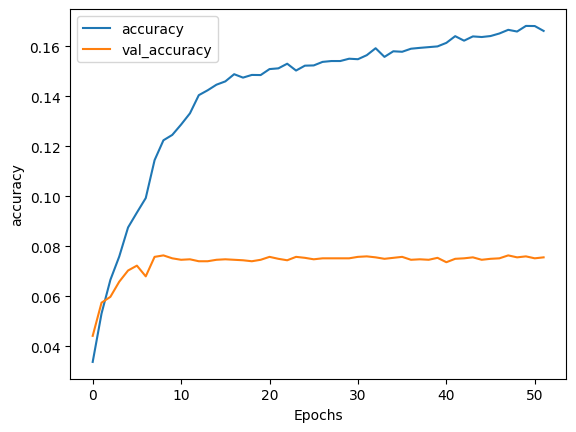

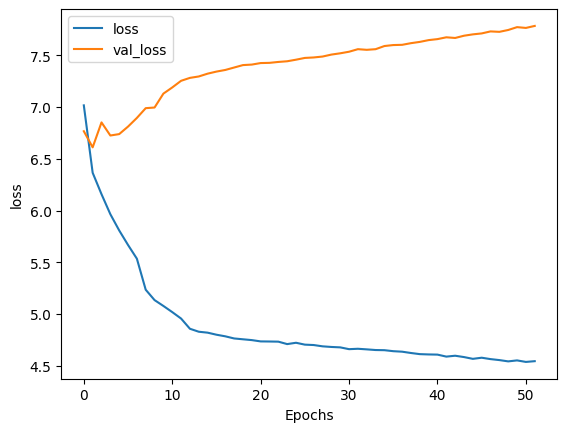

In [50]:
import matplotlib.pyplot as plt
# helper function to plot results
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [51]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_len:
        token_list = token_list[-(max_sequence_len-1):]  # Ensure the sequence length matches max_sequence_len-1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

In [52]:
input_text="To be or not to be"
print(f"Input text:{input_text}")
max_sequence_len=lstm_model1.input_shape[1]+1
next_word=predict_next_word(lstm_model1,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:To be or not to be
Next Word PRediction:the


In [53]:
input_text="  Barn. Last night of all,When yond same"
print(f"Input text:{input_text}")
max_sequence_len=lstm_model1.input_shape[1]+1
next_word=predict_next_word(lstm_model1,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:  Barn. Last night of all,When yond same
Next Word PRediction:lord


In [54]:
# Experint with different learning rates

In [55]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Define a function to train and evaluate the model for different learning rates
def experiment_with_learning_rates(model, X_train, y_train, X_val, y_val, learning_rates, epochs=50, batch_size=64):
    best_model = None
    best_val_loss = float('inf')  # Initialize to a very high value
    results = {}

    # Iterate over different learning rates
    for lr in learning_rates:
        print(f"\nTraining with learning rate: {lr}\n")
        
        # Reinitialize model for each learning rate (to ensure fair comparison)
        model_copy = tf.keras.models.clone_model(model)  # Clone the model architecture
        model_copy.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss=tf.keras.losses.CategoricalCrossentropy(),
            metrics=['accuracy']
        )
        
        # Define callbacks
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
        
        # Train the model
        history = model_copy.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            verbose=1,
            callbacks=[early_stop, reduce_lr]
        )
        
        # Get the final validation loss
        final_val_loss = min(history.history['val_loss'])
        results[lr] = final_val_loss
        
        # Update best model if this learning rate yields a lower validation loss
        if final_val_loss < best_val_loss:
            best_val_loss = final_val_loss
            best_model = model_copy
    
    return best_model, results



c:\Users\yogit\OneDrive\Desktop\DeepLearning\RNN\LSTM\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(



Training with learning rate: 0.001

Epoch 1/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.0294 - loss: 7.2162 - val_accuracy: 0.0205 - val_loss: 6.7575 - learning_rate: 0.0010
Epoch 2/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - accuracy: 0.0333 - loss: 6.4717 - val_accuracy: 0.0443 - val_loss: 6.8547 - learning_rate: 0.0010
Epoch 3/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.0402 - loss: 6.3705 - val_accuracy: 0.0480 - val_loss: 6.8861 - learning_rate: 0.0010
Epoch 4/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - accuracy: 0.0478 - loss: 6.2077 - val_accuracy: 0.0472 - val_loss: 6.9014 - learning_rate: 0.0010
Epoch 5/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.0528 - loss: 6.1008 - val_accuracy: 0.0488 - val_loss: 6.9217 - learning_rate: 0.0010
Epoch 6/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.0540 - loss: 5.9826 - val_accuracy: 0.0465 - val_loss: 6.9568 - learning_rate: 0.0010

Training with learning rate: 0.0005

E

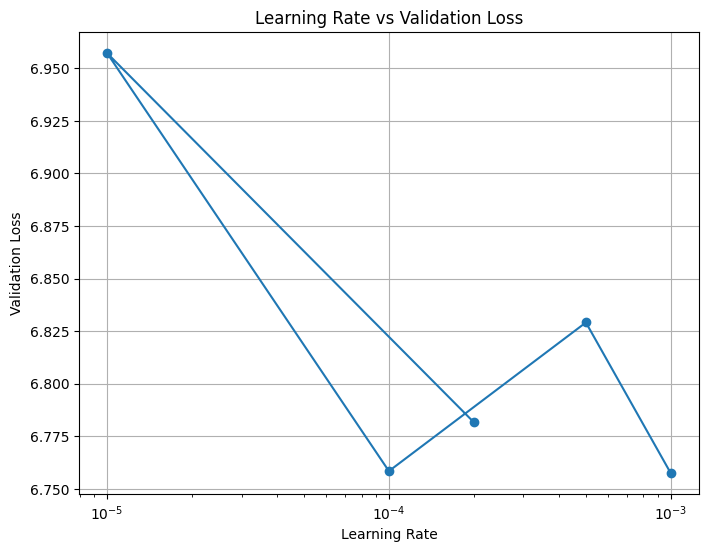

In [56]:
# Define your model
lstm_model2 = Sequential()
lstm_model2.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))
lstm_model2.add(LSTM(128, return_sequences=True))
lstm_model2.add(Dropout(0.2))
lstm_model2.add(LSTM(128))
lstm_model2.add(Dense(total_words, activation='softmax'))

# Experiment with different learning rates
learning_rates = [0.001, 0.0005, 0.0001, 0.00001, 0.0002]
best_model, results = experiment_with_learning_rates(lstm_model2, X_train, y_train, X_test, y_test, learning_rates)

# Print and visualize the results
print("\nLearning Rate Results:")
for lr, val_loss in results.items():
    print(f"Learning Rate: {lr}, Validation Loss: {val_loss}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(list(results.keys()), list(results.values()), marker='o')
plt.title("Learning Rate vs Validation Loss")
plt.xlabel("Learning Rate")
plt.ylabel("Validation Loss")
plt.xscale("log")  # Learning rates are often better visualized on a log scale
plt.grid(True)
plt.show()
